<a href="https://www.kaggle.com/code/domainescully/linear-regression?scriptVersionId=116046135" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import datetime as dt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nypd-shooting-incident-data-20062021/NYPD Shooting Incident - Data 2006-2021.csv


# Linear Regression (Exploratory Analysis)
## Shooting Incidents in New York since 2006-2021
## Author: Domaine Scully
### January 4th, 2023
### Notebook Imports

# Load The Data

In [2]:
# Show the first 5 rows
df = pd.read_csv('/kaggle/input/nypd-shooting-incident-data-20062021/NYPD Shooting Incident - Data 2006-2021.csv')
# Cast Date column into datetime object in dataframe
df['Date'] = pd.to_datetime(df['OCCUR_DATE'])
df.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat,Date
0,226323781,3/30/2021,23:45:00,QUEENS,100,0.0,MULTI DWELL - PUBLIC HOUS,False,NaN,NaN,NaN,25-44,M,BLACK,1036867,153432,40.587664,-73.810560,POINT (-73.81055977899997 40.587663570000075),2021-03-30
1,226323779,3/30/2021,16:20:00,BROOKLYN,73,2.0,MULTI DWELL - PUBLIC HOUS,False,25-44,M,BLACK,25-44,M,BLACK,1009548,187629,40.681647,-73.908790,POINT (-73.90879049699998 40.68164709200005),2021-03-30
2,226323782,3/30/2021,23:15:00,BRONX,42,2.0,MULTI DWELL - PUBLIC HOUS,False,NaN,NaN,NaN,18-24,M,BLACK,1012074,240410,40.826510,-73.899465,POINT (-73.89946470899997 40.82650984800006),2021-03-30
3,226321042,3/30/2021,13:35:00,MANHATTAN,7,0.0,NaN,False,18-24,M,BLACK,18-24,M,BLACK,987721,202253,40.721822,-73.987479,POINT (-73.98747935099993 40.72182201900005),2021-03-30
4,226320600,3/30/2021,22:23:00,BRONX,45,0.0,NaN,True,NaN,NaN,NaN,18-24,M,BLACK HISPANIC,1032091,241976,40.830722,-73.827126,POINT (-73.82712605899997 40.83072232800004),2021-03-30


In [3]:
shootings_by_year_df = df.groupby(df.Date.dt.year).count()['Date'][0:-1]
shootings_by_year_df

Date
2006    2055
2007    1887
2008    1958
2009    1828
2010    1910
2011    1939
2012    1717
2013    1339
2014    1464
2015    1434
2016    1208
2017     969
2018     951
2019     967
2020    1942
Name: Date, dtype: int64

# Get Data Into the Way We Need

In [4]:
x = shootings_by_year_df.index.values
y = shootings_by_year_df.values

In [5]:
# X Data - Years from 2006 to 2020
x

array([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020])

In [6]:
# y Data - Amount of Shootings
y

array([2055, 1887, 1958, 1828, 1910, 1939, 1717, 1339, 1464, 1434, 1208,
        969,  951,  967, 1942])

In [7]:
x = x.reshape(-1,1)
x

array([[2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012],
       [2013],
       [2014],
       [2015],
       [2016],
       [2017],
       [2018],
       [2019],
       [2020]])

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=.8, test_size=.2, random_state=100) 

# Validate Shape of Test/Train Data

In [9]:
print(f'X-Train Shape [{x_train.shape}]')

X-Train Shape [(12, 1)]


In [10]:
print(f'Y-Train Shape [{y_train.shape}]')

Y-Train Shape [(12,)]


In [11]:
print(f'X-Test Shape [{x_test.shape}]')

X-Test Shape [(3, 1)]


In [12]:
print(f'Y-Test Shape [{y_train.shape}]')

Y-Test Shape [(12,)]


# Plot Some Data

Text(0.5, 1.0, 'Shootings by Criminals in New York')

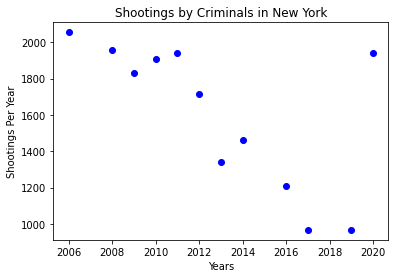

In [13]:
plt.scatter(x_train, y_train, color='blue')
plt.xlabel('Years')
plt.ylabel('Shootings Per Year')
plt.title('Shootings by Criminals in New York')

In [14]:
lm = LinearRegression()
lm.fit(x_train, y_train)
y_predict = lm.predict(x_test)

In [15]:
print(f'Training Accuracy {round(lm.score(x_train, y_train) * 100,2)}%')
print(f'Test Accuracy {round(lm.score(x_test, y_test) * 100,2)}%')

Training Accuracy 43.44%
Test Accuracy 69.7%


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

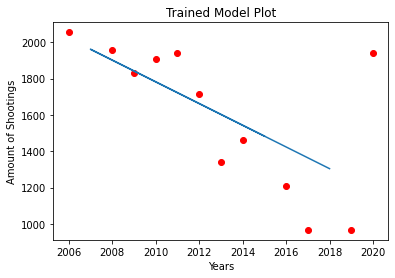

In [16]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_test, y_predict)
plt.xlabel('Years')
plt.ylabel('Amount of Shootings')
plt.title('Trained Model Plot')
plt.plot 

# Three Conclusions from the Data?

* Shootings have been going down since 2006
* Shootings spiked up by a large amount in 2020
* 2020 Shootings were close to how they were between 2008 - 2011